In [165]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import skimage.morphology
%matplotlib inline
%pylab inline
# pylab.rcParams['figure.figsize'] = (20, 20)
# pylab.rcParams['figure.figsize'] = (15, 15)
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [166]:
# img = np.array([
#         [0, 0, 0],
#         [0, 1, 0],
#         [0, 0, 0],
#     ], dtype=np.uint8)

# img = np.zeros((512, 512))

# img[img.shape[0]//2, img.shape[1]//2] = 1

# img2 = (1 - img).astype(np.uint8)

# st = time.time()
# for i in range(2000):
#     dist = cv2.distanceTransform(img2, cv2.DIST_L2, 0)
# print('elapsed', time.time() - st)
# # print(img)
# # print(dist)

In [167]:
def inverseDistanceTransform(img):
    img2 = (1 - img).astype(np.uint8)    
#     dist = cv2.distanceTransform(img2, cv2.DIST_HUBER, 0)
    dist = cv2.distanceTransform(img2, cv2.DIST_L2, 0)
#     dist = cv2.distanceTransform(img2, cv2.DIST_, 0)
    return dist

def boundaryHeatMap(distMap, sigma):
    res = np.exp(-distMap**2/(2.0*sigma**2))
    res[distMap > 3 * sigma] = 0.0
    return res
#     distMap = 1.0 - (distMap / distMap.max())
#     distMap -= 0.95
#     distMap[distMap < 0] = 0
#     distMap = (distMap / distMap.max())
    return distMap

def skeletonize(img, threshold=0.1):
    img = img.copy()
    img = img.round().astype(np.uint8).astype(np.bool)
    res = skimage.morphology.skeletonize(img)
    return res.astype(np.uint8)


In [174]:
# img = cv2.imread('/home/daiver/R3DS/Data/FacialEdgesDetection01/cache/parts/MouthUp_MouthDown/Day18_00_IMG_0302.json_0.png', 0)
# img = cv2.imread('/home/daiver/R3DS/Data/FacialEdgesDetection01/cache/parts/MouthUp_MouthDown/Day18_36_IMG_1035.json_0.png', 0)
img_orig = cv2.imread('/home/daiver/R3DS/Data/FacialEdgesDetection01/cache/parts/MouthUp_MouthDown/Day18_36_IMG_1035.json_1.png', 0)

# img = cv2.imread('/home/daiver/R3DS/Data/FacialEdgesDetection01/cache/parts/LeftEyeUp_LeftEyeDown/Day18_00_IMG_0302.json_0.png', 0)
img_orig = img_orig / 255.0

ORIGINAL


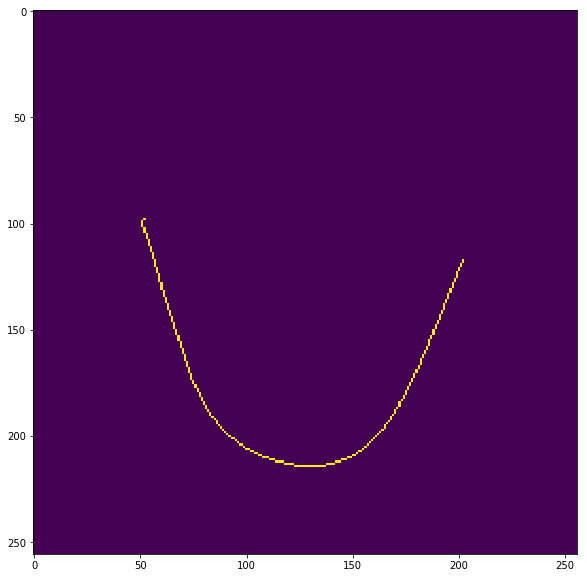

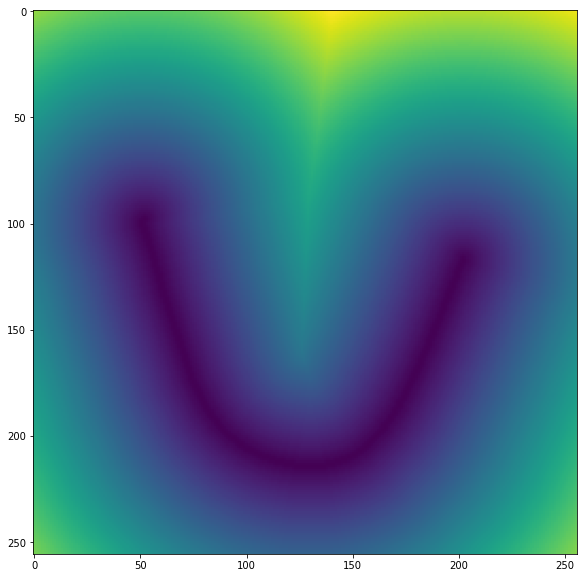

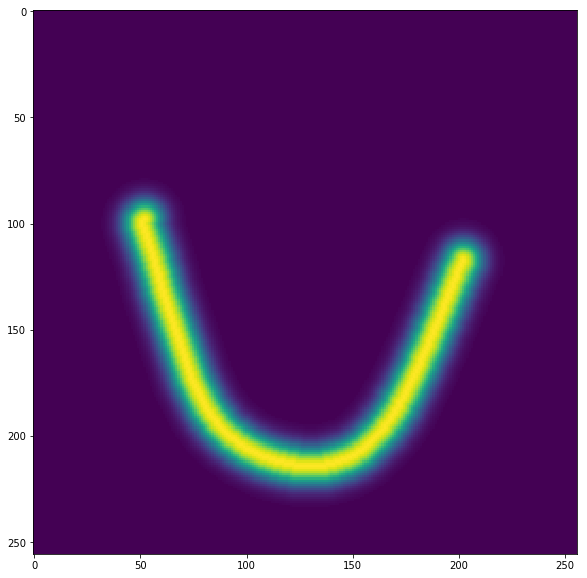

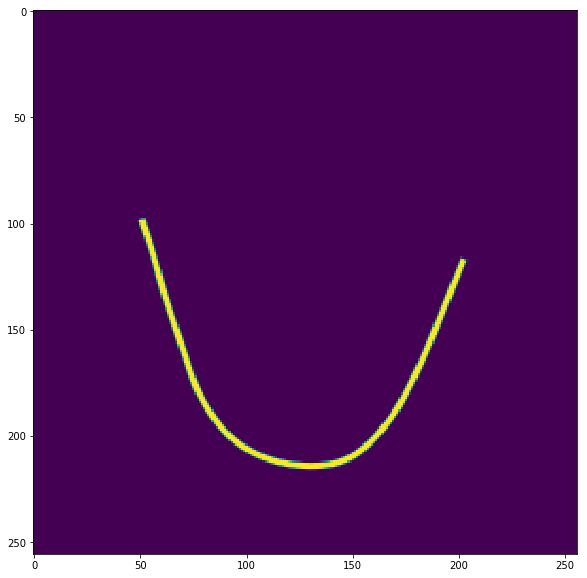

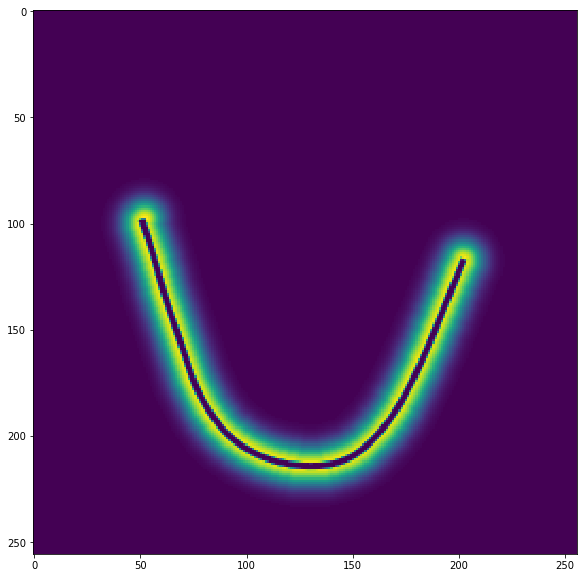

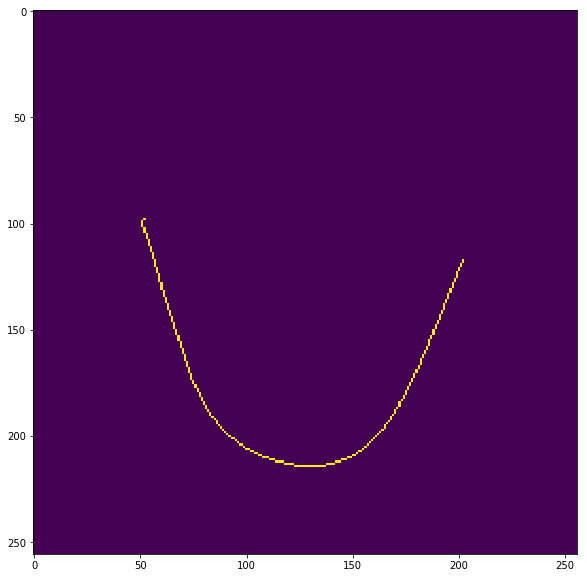

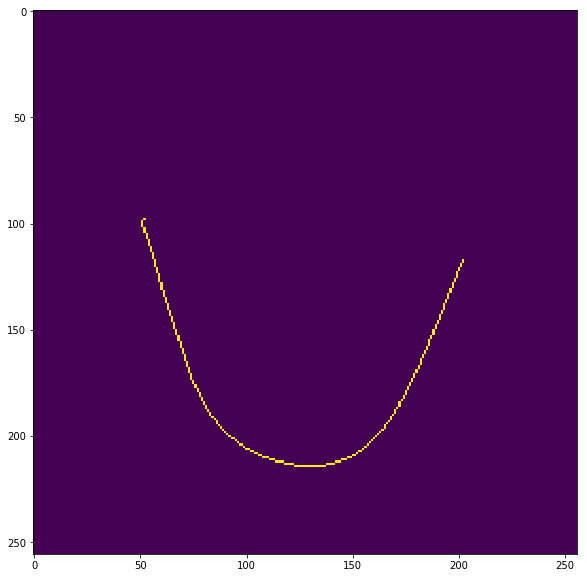

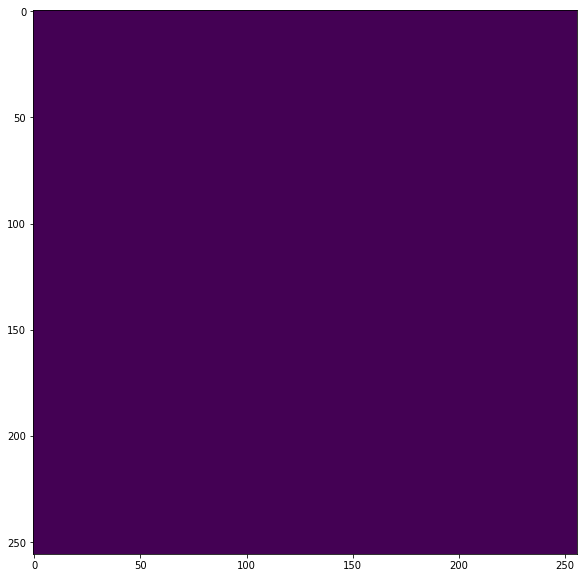

In [180]:
img = img_orig.copy()

img = skeletonize(img)
dist = inverseDistanceTransform(img)
# sigma = img.shape[0] / 60.0
sigma = img.shape[0] / 40.0
bound = boundaryHeatMap(dist, sigma)

max_val = bound.max()
restored = np.zeros_like(bound)
restored[np.abs(bound - max_val) < 1e-6] = 1

skel = skeletonize(restored)

diff = np.abs(skel - img)

# skel = cv2.pyrUp(skel)

fig = plt.figure()
plt.imshow(img)
fig = plt.figure()
plt.imshow(dist)
fig = plt.figure()
plt.imshow(bound)
fig = plt.figure()
print('ORIGINAL')
plt.imshow(img_orig)
fig = plt.figure()
plt.imshow(np.abs(img_orig - bound))
fig = plt.figure()
plt.imshow(restored)
fig = plt.figure()
plt.imshow(skel)
fig = plt.figure()
plt.imshow(diff)